In [2]:
import numpy as np #linear algebra
import pandas as pd

Load the libraries and data

In [5]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

data = pd.read_csv('/content/Sales.csv')

Grab the relevant data, scale the predictor variable, and add a colour

In [18]:
x=data['GrLivArea']
y=data['SalePrice']
x=(x-x.mean())/x.std()
x=np.c_[np.ones(x.shape[0]),x]# adds column of ones to the array

Gradient Descent

In [19]:
alpha=0.01 #step size
iterations = 2000 #o.of iterations
m=y.size #no. of data points
np.random.seed(123) #set the seed
theta = np.random.rand(2) #pick som random values to sart with
#Gradient descent
def gradient_descent(x,y,theta,iterations,alpha):
  past_costs=[]
  past_thetas=[theta]
  for i in range(iterations):
    prediction=np.dot(x,theta)
    error = prediction-y
    cost =1/(2*m) * np.dot(error.T,error)
    past_costs.append(cost)
    theta=theta-(alpha*(1/m)*np.dot(x.T,error))
    past_thetas.append(theta)
  return past_thetas, past_costs
#pass the relevant variables to the function and get new values back
past_thetas,past_costs=gradient_descent(x,y,theta,iterations,alpha)
theta = past_thetas[-1]

#print the results
print("Gradient Descent: {:.2f},{:.2f}".format(theta[0],theta[1]))

Gradient Descent: 180921.20,56294.90


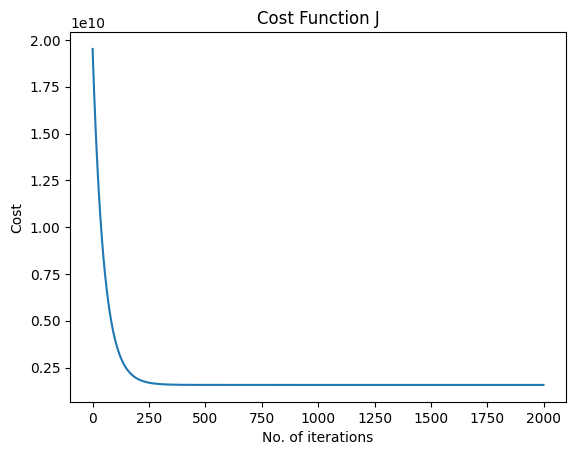

In [20]:
#Plot the cost function..
plt.title('Cost Function J')
plt.xlabel('No. of iterations')
plt.ylabel('Cost')
plt.plot(past_costs)
plt.show()

Animation

In [22]:
from re import X
#Animation

#set the plot up
fig = plt.figure()
ax = plt.axes()
plt.title('Sale Price vs Living Area')
plt.xlabel('Living Area in square feet (normalised)')
plt.ylabel('Sale Price ($)')
plt.scatter(x[:,1], y, color = 'red')
line, = ax.plot([],[],lw=2)
annotation= ax.text(-1, 700000, '')
annotation.set_animated(True)
plt.close()

#Generate the animation data,
def init():
  line.set_data([],[])
  annotation.set_text('')
  return line, annotation

#animation function. This is called sequentially
def animate(i):
  x=np.linspace(-5,20,1000)
  y=past_thetas[i][1]*x+past_thetas[i][0]
  line.set_data(x,y)
  annotation.set_text('Cost = %.2f e10' % (past_costs[i]/1000000000))
  return line, annotation

anim = animation.FuncAnimation(fig, animate, init_func=init, frames = 300, interval=0, blit=True)
anim.save('animation.gif', writer='imagemagick', fps=30)

In [26]:
#Display the animation
import io
import base64
from IPython.display import HTML
filename = 'animation.gif'
video = io.open(filename, 'r+b').read()
encoded = base64.b64encode(video)
HTML(data='''<img src="data:imgage/gif;base64,{0}"type="gif"/>'''.format(encoded.decode('ascii')))